#### Machine Learning

In [2]:
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#df = pd.read_csv("../../data/exosomes.raw_spectrum_1.csv")

In [4]:
df = pd.read_csv("../../data/current_clean_spectrum.csv")

In [5]:
df

,Unnamed: 0,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,0,201210-1-00,0,200.00000,201210-1,Normal,476.579528
1,1,201210-1-00,1,200.68336,201210-1,Normal,473.073987
2,2,201210-1-00,2,201.36674,201210-1,Normal,469.641910
3,3,201210-1-00,3,202.05011,201210-1,Normal,466.283299
4,4,201210-1-00,4,202.73349,201210-1,Normal,462.998152
...,...,...,...,...,...,...,...
8023570,8023570,210526-3-09,2630,1997.26650,210526-3,Hyperglycemia,38.734010
8023571,8023571,210526-3-09,2631,1997.94980,210526-3,Hyperglycemia,39.237209
8023572,8023572,210526-3-09,2632,1998.63330,210526-3,Hyperglycemia,39.765292
8023573,8023573,210526-3-09,2633,1999.31670,210526-3,Hyperglycemia,40.318258


In [6]:
def prepare_wavelength_df(df, absorbance_col, status_col='Status'):

    # Pivot the DataFrame to get wavelengths as columns and absorbance values
    wavelength_df = df.pivot(index='SpecID', columns='WaveNumber', values=absorbance_col).reset_index()
    wavelength_df.columns.name = None

    # Merge with the statuses based on SpecID
    statuses = df[['SpecID', status_col]].drop_duplicates()
    wavelength_df = pd.merge(wavelength_df, statuses, on='SpecID')

    # Set SpecID as the index
    wavelength_df = wavelength_df.set_index('SpecID')

    return wavelength_df

In [7]:
wavelength_df = prepare_wavelength_df(df, 'Absorbance')

In [8]:
wavelength_df.head()

,200.0,200.68336,201.36674,202.05011,202.73349,203.41685,204.10023,204.7836,205.46696,206.15034,...,1994.5331,1995.2164,1995.8998,1996.5831,1997.2665,1997.9498,1998.6333,1999.3167,2000.0,Status
SpecID,,,,,,,,,,,,,,,,,,,,,
201210-1-00,476.579528,473.073987,469.641910,466.283299,462.998152,459.786471,456.648254,453.583502,450.592215,447.674393,...,43.653199,43.727436,43.796916,43.861639,43.921604,43.976812,44.027263,44.072956,44.113892,Normal
201210-1-01,583.519601,576.691965,570.052618,563.601559,557.338789,551.264307,545.378114,539.680210,534.170595,528.849268,...,81.959679,83.214443,84.505469,85.832757,87.196306,88.596116,90.032188,91.504521,93.013116,Normal
201210-1-02,840.865994,828.189416,815.849949,803.847592,792.182346,780.854210,769.863185,759.209270,748.892466,738.912773,...,242.173622,247.926709,253.782946,259.742334,265.804873,271.970563,278.239403,284.611394,291.086535,Normal
201210-1-03,3304.961225,3395.517937,3481.880522,3564.048979,3642.023309,3715.803510,3785.389584,3850.781531,3911.979349,3968.983040,...,56.176246,56.568015,56.974330,57.395191,57.830598,58.280552,58.745051,59.224097,59.717689,Normal
201210-1-04,604.282442,600.108527,596.008505,591.982377,588.030143,584.151802,580.347355,576.616801,572.960140,569.377374,...,42.669851,43.152379,43.648221,44.157377,44.679847,45.215632,45.764731,46.327143,46.902870,Normal


Fit an Extra Trees Classifier on the whole dataset.

In [9]:
# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the Extra Trees classifier
et = ExtraTreesClassifier(random_state=1234)

et = ExtraTreesClassifier(random_state=1234)
et.fit(X, y)

ExtraTreesClassifier(random_state=1234)

In [10]:
feature_names = X.columns
importances = et.feature_importances_

# Creating a DataFrame from the feature names and importance
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': importances
})

wavenumber_importance_df

,WaveNumber,Importance
0,200.0,0.001232
1,200.68336,0.001010
2,201.36674,0.000997
3,202.05011,0.001102
4,202.73349,0.000985
...,...,...
2630,1997.2665,0.000754
2631,1997.9498,0.000531
2632,1998.6333,0.000354
2633,1999.3167,0.000477


In [11]:
df

,Unnamed: 0,SpecID,Seq,WaveNumber,SurID,Status,Absorbance
0,0,201210-1-00,0,200.00000,201210-1,Normal,476.579528
1,1,201210-1-00,1,200.68336,201210-1,Normal,473.073987
2,2,201210-1-00,2,201.36674,201210-1,Normal,469.641910
3,3,201210-1-00,3,202.05011,201210-1,Normal,466.283299
4,4,201210-1-00,4,202.73349,201210-1,Normal,462.998152
...,...,...,...,...,...,...,...
8023570,8023570,210526-3-09,2630,1997.26650,210526-3,Hyperglycemia,38.734010
8023571,8023571,210526-3-09,2631,1997.94980,210526-3,Hyperglycemia,39.237209
8023572,8023572,210526-3-09,2632,1998.63330,210526-3,Hyperglycemia,39.765292
8023573,8023573,210526-3-09,2633,1999.31670,210526-3,Hyperglycemia,40.318258


Seaborn was using different axes so I used Matplotlib instead.

Text(0.5, 1.0, 'Feature Importance and Average Spectra of each Status')

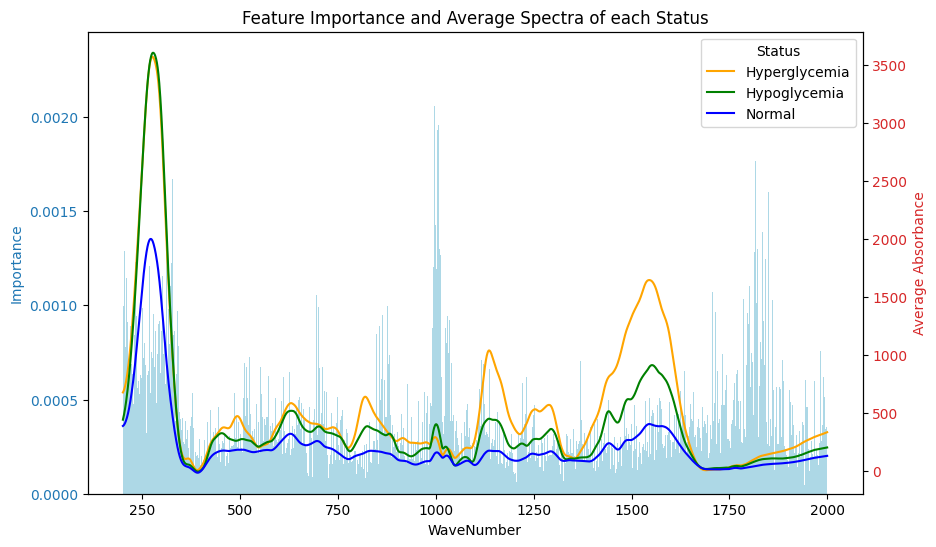

In [12]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# # Show the plot
# plt.tight_layout()
# plt.show()

#### **Cross-Val Importance**

Training the model on the whole dataset may be misleading, lets look at the average feature importance of each WaveNumber across the 10 folds.

In [13]:
from sklearn.model_selection import KFold

# Splitting the dataframe into features (X) and target variable (y)
X = wavelength_df.drop(['Status'], axis=1)
y = wavelength_df['Status']

# Creating the KFold object
cv = KFold(n_splits=10, shuffle=True, random_state=1234)

# Initialising an array to store feature importances across all folds
feature_importances = np.zeros(X.shape[1])

# Looping through each split
for train_index, test_index in cv.split(X):
    # Splitting the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Creating and fitting the Extra Trees classifier
    et = ExtraTreesClassifier(random_state=1234)
    et.fit(X_train, y_train)
    
    # Accumulating the feature importances
    feature_importances += et.feature_importances_

# Averaging the feature importances across all folds
feature_importances /= 10

# Creating a DataFrame from the feature names and their average importance
feature_names = X.columns
wavenumber_importance_df = pd.DataFrame({
    'WaveNumber': feature_names,
    'Importance': feature_importances
})

# Optionally, you might want to sort the DataFrame based on the importances
wavenumber_importance_df = wavenumber_importance_df.sort_values(by='Importance', ascending=False)

# Displaying the DataFrame
wavenumber_importance_df

,WaveNumber,Importance
1170,999.54443,0.001895
1171,1000.2278,0.001812
1174,1002.2779,0.001774
1179,1005.6948,0.001676
1167,997.49432,0.001674
...,...,...
1866,1475.1709,0.000139
1842,1458.7699,0.000139
858,786.33258,0.000138
862,789.06604,0.000126


Text(0.5, 1.0, 'Feature Importance and Average Spectra of each Status')

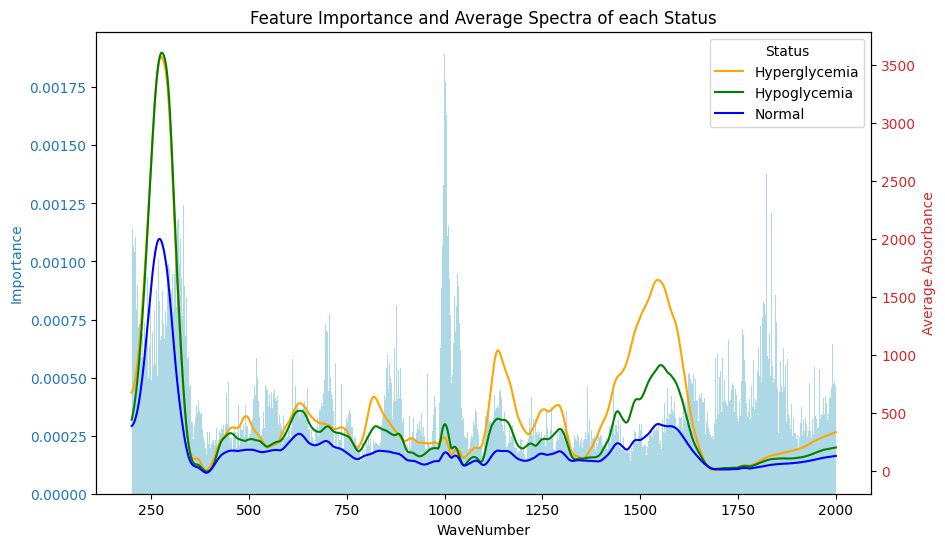

In [14]:
# Create the figure and the first (left) axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the bar plot on the first axis for Feature Importance
colors = ['lightblue'] * len(wavenumber_importance_df['WaveNumber'])
ax1.bar(wavenumber_importance_df['WaveNumber'], wavenumber_importance_df['Importance'], color=colors)
ax1.set_xlabel('WaveNumber')
ax1.set_ylabel('Importance', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create the second (right) axis, sharing the same x-axis
ax2 = ax1.twinx()

# Calculate average absorbance by WaveNumber and Status
avg_absorbance = df.groupby(['WaveNumber', 'Status'])['Absorbance'].mean().reset_index()

# Color mapping for 'Status'
color_map = {'Normal': 'blue', 'Hyperglycemia': 'orange', 'Hypoglycemia': 'green'}

# Plot average absorbance line plot on the second axis for each status
for status, group in avg_absorbance.groupby('Status'):
    ax2.plot(group['WaveNumber'], group['Absorbance'], label=status, color=color_map[status])

ax2.set_ylabel('Average Absorbance', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding legend for the line plots to distinguish between statuses
ax2.legend(title='Status')

# Title for the entire plot
plt.title('Feature Importance and Average Spectra of each Status')

# # Show the plot
# plt.tight_layout()
# plt.show()